**Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyper‐
parameters, such as kernel="linear" (with various values for the C hyperpara‐
meter) or kernel="rbf" (with various values for the C and gamma
hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?**

In [1]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
!wget "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz" #where we load the .tgz in a local directory
housing_tgz = tarfile.open('./housing.tgz')#
housing_tgz.extractall('./housing1')# crete the foldr and
housing_tgz.close()
h=pd.read_csv('./housing1/housing.csv')


--2023-08-04 00:48:50--  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409488 (400K) [application/octet-stream]
Saving to: ‘housing.tgz’

housing.tgz         100%[===================>] 399.89K  --.-KB/s    in 0.04s   

2023-08-04 00:48:50 (9.64 MB/s) - ‘housing.tgz’ saved [409488/409488]



In [2]:
h.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
h.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
cor_housing=h.corr()
print(cor_housing)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

<ipython-input-5-db3463cfbc76>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_housing=h.corr()


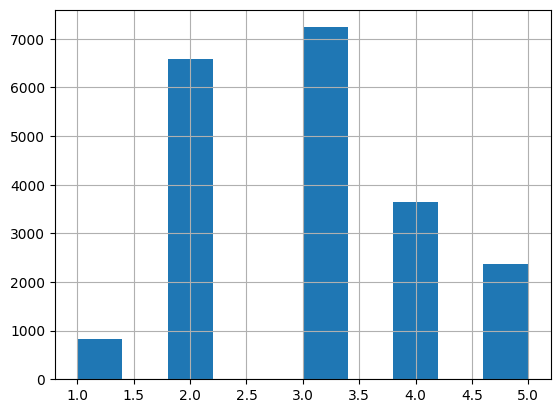

In [6]:
h["income_cat"] = pd.cut(h["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
h["income_cat"].hist()

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(h, h["income_cat"]):
   strat_train_set = h.loc[train_index]
   strat_test_set =  h.loc[test_index]

h = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

for set_ in (strat_train_set, strat_test_set):
   set_.drop("income_cat", axis=1, inplace=True)

In [7]:
from pandas.plotting import scatter_matrix
#scatter_matrix(h, figsize=(12, 8))

from above we can see total_bedrooms  is almost in corelation with population,households,total_rooms      

In [8]:
from sklearn.base import TransformerMixin,BaseEstimator
import numpy as np
class addingAtributes(BaseEstimator,TransformerMixin):
  def __init__(self,bedrooms_per_room=True,rooms_per_household=True,bedrooms_per_household=True,households_per_pop=True):
    self.bedrooms_per_room=bedrooms_per_room
    self.rooms_per_household=rooms_per_household
    self.bedrooms_per_household=bedrooms_per_household
    self.households_per_pop=households_per_pop

  def fit(self,X,y=None):
    return self
  def transform(self,X):
    if(self.bedrooms_per_room):
      X["bedrooms_per_room"]=X["total_bedrooms"]/X["total_rooms"]

    if (self.rooms_per_household):
      X['rooms_per_household']=X["total_rooms"]/X["households"]

    if (self.bedrooms_per_household):
      X['bedrooms_per_household']=X["total_bedrooms"]/X["households"]

    if (self.households_per_pop):
       X['households_per_pop']=X["households"]/h["population"]

    self.X=X
    return X
  def get_feature_names(self):
        return self.X.columns


#attr_adder = addingAtributes(bedrooms_per_room=False)
#housing_extra_attribs = attr_adder.transform(h.values)
#h_extra=pd.DataFrame(housing_extra_attribs)
#h_extra.head()

In [9]:
from pickle import NONE
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.linear_model import LinearRegression
class MissingValues(BaseEstimator,TransformerMixin):
  def __init__(self):
    self.h1_train=None
    self.h1_test=None

    self.Y=None

  def fit(self,X,Y=None):
    self.X1=X.loc[:,["total_bedrooms","households","total_rooms","population"]]
    self.h1_train=self.X1[self.X1["total_bedrooms"].notnull()]

    self.Y= np.nan_to_num(Y) if Y is not None else None
    self.model=LinearRegression()
    self.model.fit(self.h1_train.drop("total_bedrooms",axis=1),self.h1_train["total_bedrooms"])
    return self

  def transform(self,X):
    self.h1_test=self.X1[self.X1["total_bedrooms"].isnull()]
    h1_predict=np.round(self.model.predict(self.h1_test.drop("total_bedrooms",axis=1)))
    self.X=X.loc[X['total_bedrooms'].isnull(), 'total_bedrooms'] = h1_predict


    return X






In [10]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

#from sklearn.experimental import enable_knnimputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('Linear_reg',MissingValues()),
                        ('attribs_adder', addingAtributes(households_per_pop=False)),
                       ('std_scaler', StandardScaler())])

cat_pipeline=Pipeline(["cat_att",OrdinalEncoder()])

from sklearn.compose import ColumnTransformer
num_attribs = h.drop("ocean_proximity",axis=1)

cat_attribs = ["ocean_proximity"]


full_pipeline = ColumnTransformer([
     ("num", num_pipeline, list(num_attribs)),
     ("cat", OrdinalEncoder(), (cat_attribs)),



])

In [11]:
h.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3


In [12]:
housing_prepared = full_pipeline.fit_transform(h)
I=addingAtributes(households_per_pop=False)
h1=I.transform(h.drop(["ocean_proximity"],axis=1))
additional_features=['ocean_proximity']
feature_names=(h1.columns).append(pd.Index(additional_features))
print(feature_names)
df = pd.DataFrame(data=housing_prepared, columns=feature_names)
df.head()



Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'income_cat', 'bedrooms_per_room', 'rooms_per_household',
       'bedrooms_per_household', 'ocean_proximity'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,bedrooms_per_room,rooms_per_household,bedrooms_per_household,ocean_proximity
0,-0.941350,1.347438,0.027564,0.584777,0.635170,0.732602,0.556286,-0.893647,-0.954687,-0.124948,0.017395,0.059849,1.0
1,1.171782,-1.192440,-1.722018,1.261467,0.775725,0.533612,0.721318,1.292168,1.890078,-0.911027,0.569256,0.029050,4.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545007,-0.674675,-0.524407,-0.525434,-0.954687,-0.372427,-0.018024,-0.128650,1.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.038524,-0.467617,-0.037297,-0.865929,-0.954687,1.108541,-0.595140,-0.047380,4.0
4,0.437431,-0.635818,-0.131489,0.427179,0.269243,0.374060,0.220898,0.325752,-0.006432,-0.527696,0.251241,0.030060,0.0


In [13]:
cor_housing1=df.corr()
print(cor_housing1)


                        longitude  latitude  housing_median_age  total_rooms  \
longitude                1.000000 -0.924478           -0.105823     0.048909   
latitude                -0.924478  1.000000            0.005737    -0.039245   
housing_median_age      -0.105823  0.005737            1.000000    -0.364535   
total_rooms              0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms           0.075099 -0.071609           -0.324998     0.929067   
population               0.108071 -0.115290           -0.298737     0.855103   
households               0.063146 -0.077765           -0.306473     0.918396   
median_income           -0.019615 -0.075146           -0.111315     0.200133   
income_cat              -0.016281 -0.078768           -0.139314     0.221745   
bedrooms_per_room        0.095608 -0.117246            0.136804    -0.192218   
rooms_per_household     -0.028374  0.107665           -0.147184     0.127549   
bedrooms_per_household   0.012483  0.070

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(df, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [15]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [16]:
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]
from sklearn.svm import SVR
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  11.3s
[CV] END ..............................C=10.0, kernel=linear; total time=  11.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.9s
[CV] END ..............................C=10.0, kernel=linear; total time=  11.4s
[CV] END ..............................C=10.0, kernel=linear; total time=  12.7s
[CV] END ..............................C=30.0, kernel=linear; total time=  12.7s
[CV] END ..............................C=30.0, kernel=linear; total time=  11.5s
[CV] END ..............................C=30.0, kernel=linear; total time=  11.4s
[CV] END ..............................C=30.0, kernel=linear; total time=  12.0s
[CV] END ..............................C=30.0, kernel=linear; total time=  11.1s
[CV] END .............................C=100.0, kernel=linear; total time=  11.1s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [17]:
grid_search.best_params_

{'C': 3000.0, 'kernel': 'linear'}